In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

data = pandas.read_csv('StudentStatistics.csv', sep = ';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [2]:
# H0 - There is no association between the gender and the marks obtain
# Ha - There is an association between the gender and the marks obtain

# Displaying the Gen_Gender data
data['Gen_Gender']

0     Female
1       Male
2       Male
3     Female
4       Male
5       Male
6     Female
7     Female
8       Male
9       Male
10      Male
11      Male
12      Male
13      Male
14    Female
15      Male
16       NaN
17    Female
18      Male
19      Male
20    Female
21       NaN
22    Female
23      Male
24      Male
25      Male
26      Male
27      Male
28      Male
29      Male
30    Female
31       NaN
32      Male
33      Male
34       NaN
35      Male
36      Male
37      Male
38      Male
39      Male
40       NaN
41    Female
42       NaN
43      Male
44      Male
45      Male
46      Male
47      Male
48       NaN
49       NaN
50      Male
51      Male
52    Female
53    Female
54       NaN
Name: Gen_Gender, dtype: object

In [3]:
# Grouping the data of the columns Gen_Gender and Over_Grade together and calculating the mean and the standard deviation

data.groupby('Gen_Gender')['Over_Grade'].mean()

data.groupby('Gen_Gender')['Over_Grade'].std()

# Bifercating the Over_Grade on the basis of maleScores and the femaleScores

maleScores = data['Over_Grade'][data['Gen_Gender'] == 'Male'].dropna()
femaleScores = data['Over_Grade'][data['Gen_Gender'] == 'Female'].dropna()


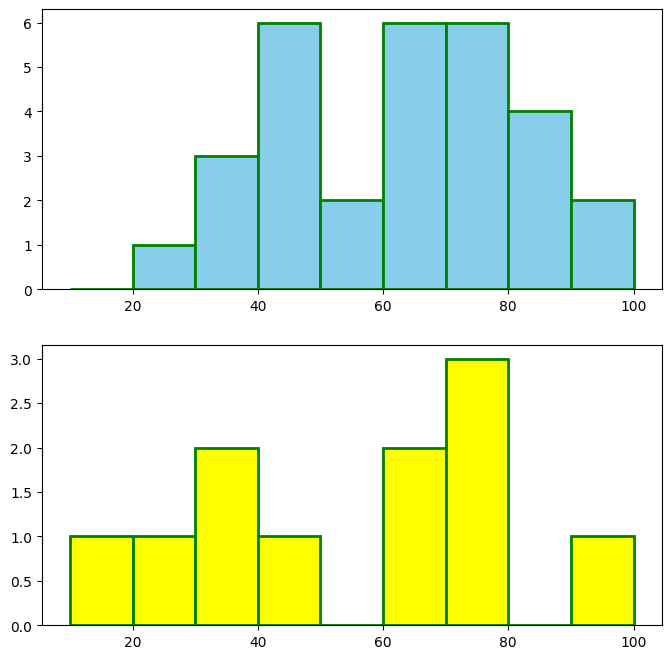

In [4]:
# Plotting the male and female scores in different bar charts for visualisation

plt.figure(1, figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(maleScores, color='skyblue', edgecolor='green', lw=2, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.subplot(2,1,2)
plt.hist(femaleScores, color='yellow', edgecolor='green', lw=2, bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.show()

In [5]:
# Performing the Welsh t test

from scipy.stats import ttest_ind

ttest_ind(maleScores, femaleScores, equal_var = False)

TtestResult(statistic=0.6936894455945684, pvalue=0.4991001245520197, df=14.158919197596669)

In [6]:
pvalue=0.4991001245520197

# H0 (Null Hypothesis) i.e. no association between the gender and marks is accepted

In [8]:
!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

import stikpetP as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.2/249.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stikpetP: filename=stikpetP-0.0.3-py3-none-any.whl size=416660 sha256=d561bd36d2cada747a3dc17da4b3bf7a9c2ff87998d7d4e00f58028ad6b37316
  Stored in directory: /tmp/pip-ephem-wheel-cache-21n1f581/wheels/65/58/9c/d9a9e2185c9bb20de121369a2b0f5452a2a582c4b4df87e446
Successfully built stikpetP


In [9]:
# Calculating the effect size using cohen d_s

ps.es_hedges_g_is(data['Gen_Gender'], data['Over_Grade'])

,g,version
0,0.282253,Cohen ds (Hedges g (uncorrected)


In [10]:
d_s = 0.282253

if d_s < 0.01:
  print('Negligible')

elif d_s < 0.2:
  print('very small')

elif d_s < 0.5:
  print('small')

elif d_s < 0.8:
  print('medium')

elif d_s < 1.2:
  print('large')

elif d_s < 2:
  print('very large')

else:
  print('huge')

small


Welsh t test applied to the data not find any evidence to reject the hypothesis that there is no evidence between gender and marks obtained as pvalue = 0.49. With the cohen d value as 0.28 the strength of association is also found to be small.